# Woj Twitter Analysis
> Can we learn anything from Woj's Twitter?

- toc: true 
- badges: true
- comments: true
- categories: [twint, data_visualization]
- image: /images/woj_bomb.jpg

# Woj Bombs - Twitter Analysis using NLP

Anyone who seriously follows the NBA knows where to go for breaking news: the Twitter accounts of ESPN's Adrian Wojnarowski.

Like any Twitter account, it's easy to forget that Woj's account grew from humble beginnings.

Here's Woj's first ever tweet from @wojespn (note: Woj's Twitter handle changed when he joined ESPN in 2009), dated 24-June-2009: 

> twitter: https://twitter.com/wojespn/status/2311135902

Since then, Woj's follower count has grown to 4.7 million as of 6-July-2021.

What might we learn by analyzing 12 years of Woj tweets? The purpose of this exercise is to find out.

### Visualizing the Tweets



After using [twint](https://pypi.org/project/twint/) to extract all the tweets from Woj's account, I went about cleaning the data and organizing it into a pandas dataframe:

In [ ]:
#hide
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [100]:
df = pd.read_csv('/Users/jhoffstein/twint/woj.csv', sep='\t', lineterminator='\r', low_memory=False)

In [101]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16539 non-null  object 
 1   conversation_id  16538 non-null  float64
 2   created_at       16538 non-null  object 
 3   date             16538 non-null  object 
 4   time             16538 non-null  object 
 5   timezone         16538 non-null  float64
 6   user_id          16538 non-null  float64
 7   username         16538 non-null  object 
 8   name             16538 non-null  object 
 9   place            0 non-null      float64
 10  tweet            16538 non-null  object 
 11  language         16538 non-null  object 
 12  mentions         16538 non-null  object 
 13  urls             16538 non-null  object 
 14  photos           16538 non-null  object 
 15  replies_count    16538 non-null  float64
 16  retweets_count   16538 non-null  float64
 17  likes_count 

None

In [102]:
# I don't need these columns, so dropping them
drop_list = ['place','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest']
df = df.drop(columns=drop_list)

In [103]:
# remove URLs
df['tweet'] = df['tweet'].str.replace('http\S+|www.\S+', '',case=False)

/var/folders/dr/jwj01j9s64s4s24j87qpmg8sq27k40/T/ipykernel_24930/411855716.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



# Basic Data Visualization with Texthero and Sweetviz

In [ ]:
#hide
!pip3 install texthero
!pip3 install sweetviz
import texthero as hero
import sweetviz as sv

In [104]:
# text preprocessing
from texthero import preprocessing

# create a custom pipeline to preprocess the raw text
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords]

# call clean() method to clean the raw text in 'tweet' col and pass the custom_pipeline to pipeline argument
df['clean_tweet'] = hero.clean(df['tweet'], pipeline = custom_pipeline)

In [105]:
#Reduce dimensions
df['pca'] = (
            df['clean_tweet']
            .pipe(hero.clean)
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   )


In [ ]:
#tokenize the tweets
df['tfidf'] = (
    hero.tfidf(df['clean_tweet'], max_features=100)
)
df[["tfidf"]].head(2)

In [114]:
#find named entities
df['named_entities'] = hero.named_entities(df['clean_tweet'])

In [119]:
#check out the top words used
NUM_TOP_WORDS = 10
hero.top_words(df['clean_tweet'])[:NUM_TOP_WORDS]

sources    5741
league     3791
espn       3437
tell       3096
deal       2741
nba        2425
source     2107
tells      1924
yahoo      1791
sports     1667
Name: clean_tweet, dtype: int64

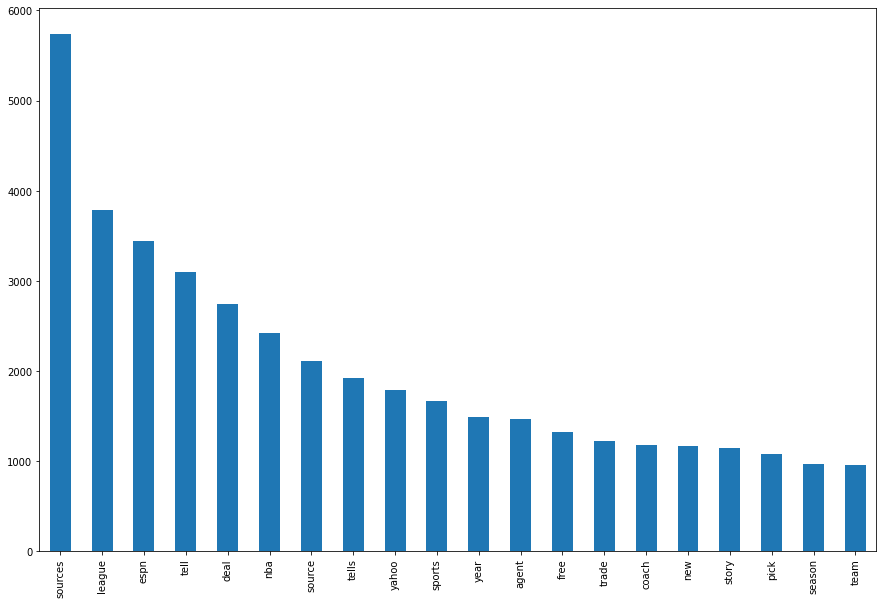

In [23]:
# using top_words() method, get the top N words and make a bar plot.
hero.top_words(df['clean_tweet']).head(20).plot.bar(figsize=(15,10))
plt.show()

In [123]:
# Add more stop words
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
stop_w = ["co","https","http", "tell", "tells", "game", "season", "sports", "two"]
custom_stopwords = default_stopwords.union(set(stop_w))
#Call remove_stopwords and pass the custom_stopwords list
df['clean_tweet'] = hero.remove_stopwords(df['clean_tweet'], custom_stopwords)

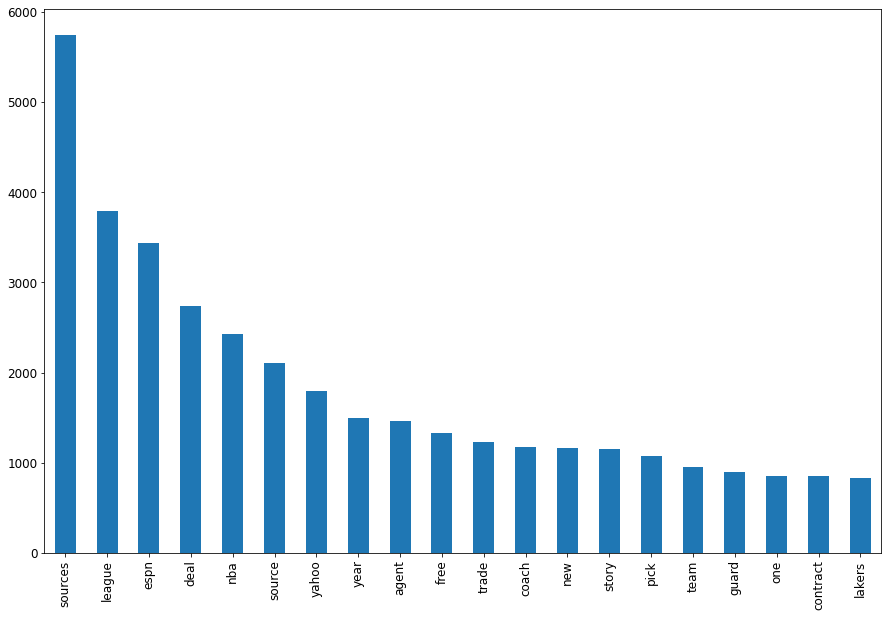

In [124]:
# Visualize again
hero.top_words(df['clean_tweet']).head(20).plot.bar(figsize=(15,10))
plt.show()

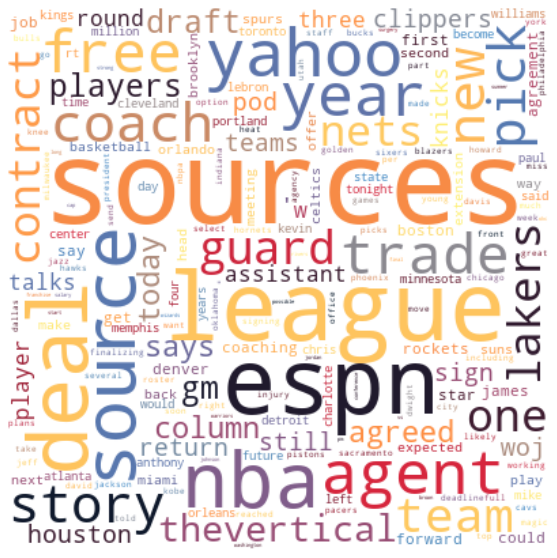

In [125]:
# Create a word cloud
hero.visualization.wordcloud(df['clean_tweet'],width = 400, height= 400,background_color='White')

In [126]:
#Add k-means cluster to dataframe 
df['kmeans'] = (
            df['clean_tweet']
            .pipe(hero.tfidf,max_features=300)
            .pipe(hero.kmeans, n_clusters=5)
   )

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



id  conversation_id               created_at  \
0  \n1412479849080320001     1.412480e+18  2021-07-06 14:33:33 EDT   
1  \n1412114670060773377     1.412114e+18  2021-07-05 14:22:27 EDT   
2  \n1412114367852781568     1.412114e+18  2021-07-05 14:21:15 EDT   
3  \n1412097959219675144     1.412097e+18  2021-07-05 13:16:03 EDT   
4  \n1412097377725566977     1.412097e+18  2021-07-05 13:13:45 EDT   

         date      time  timezone     user_id username                name  \
0  2021-07-06  14:33:33    -400.0  50323173.0  wojespn  Adrian Wojnarowski   
1  2021-07-05  14:22:27    -400.0  50323173.0  wojespn  Adrian Wojnarowski   
2  2021-07-05  14:21:15    -400.0  50323173.0  wojespn  Adrian Wojnarowski   
3  2021-07-05  13:16:03    -400.0  50323173.0  wojespn  Adrian Wojnarowski   
4  2021-07-05  13:13:45    -400.0  50323173.0  wojespn  Adrian Wojnarowski   

                                                                                                                                                                                                                                                                               tweet  \
0      Reporting with @Malika_Andrews: Milwaukee’s Giannis Antetokounmpo has continued around-the-clock treatment on his left knee with hopes of becoming cleared to play Game 1 of the Finals vs. Phoenix tonight. There’s expected to be a game-time decision on his availability.   
1                                                                                                                                                                     Mosley and Unseld Jr., are also serious head coaching candidates for the Orlando Magic job, sources tell ESPN.   
2  Washington’s search process for a new coach has narrowed to several assistants, including Dallas’ Jamahl Mosley, Milwaukee’s Darvin Ham and Charles Lee and Denver’s Wes Unseld, Jr., sources tell ESPN. Those are among the candidates who will talk to Wizards again this week.   
3                                                                                                                                                                                                            Schlenk announced the agreement on a media conference call minutes ago.   
4                                                                                                                     Atlanta president/GM Travis Schlenk told reporters that an agreement was in place to shed interim label after McMillan led Hawks to Eastern Conference Finals.   

  language  \
0       en   
1       en   
2       en   
3       en   
4       en   

                                                                            mentions  \
0  [{'screen_name': 'malika_andrews', 'name': 'malika andrews', 'id': '2379200053'}]   
1                                                                                 []   
2                                                                                 []   
3                                                                                 []   
4                                                                                 []   

  urls photos  replies_count  retweets_count  likes_count hashtags cashtags  \
0   []     []          244.0          1059.0       7308.0       []       []   
1   []     []           29.0           173.0       1340.0       []       []   
2   []     []          164.0           543.0       4098.0       []       []   
3   []     []           20.0            91.0       1633.0       []       []   
4   []     []           29.0           187.0       2762.0       []       []   

                                                     link retweet quote_url  \
0  https://twitter.com/wojespn/status/1412479849080320001   False       NaN   
1  https://twitter.com/wojespn/status/1412114670060773377   False       NaN   
2  https://twitter.com/wojespn/status/1412114367852781568   False       NaN   
3  https://twitter.com/wojespn/status/14120979

In [127]:
# Generate scatter plot for pca and kmeans
hero.scatterplot(df, 'pca', color = 'kmeans', hover_data=['clean_tweet'] )

# Analyze engagement over time

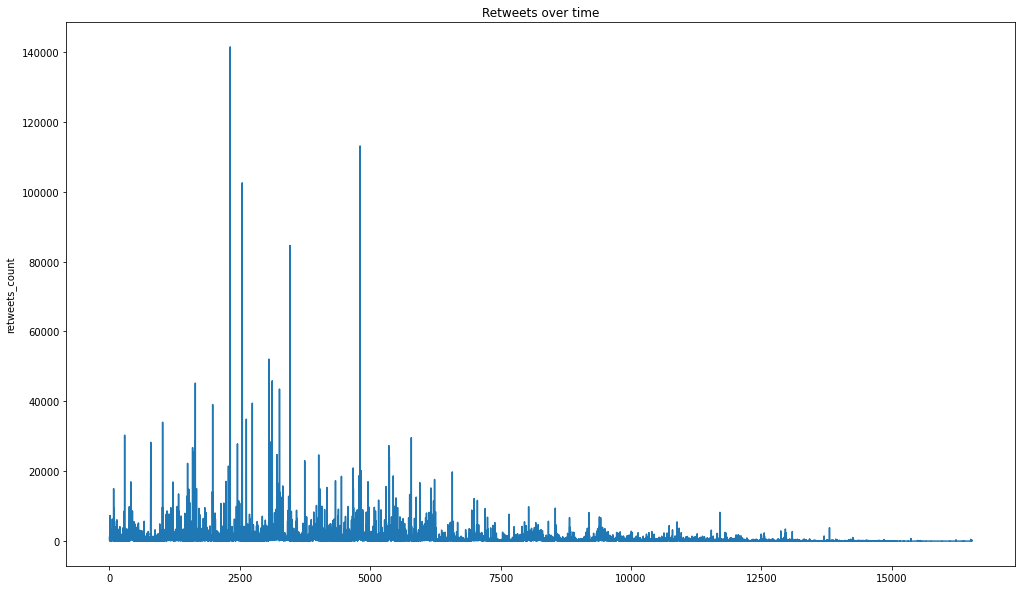

In [37]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df['retweets_count'], dashes=False)
plt.title("Retweets over time")
plt.show()

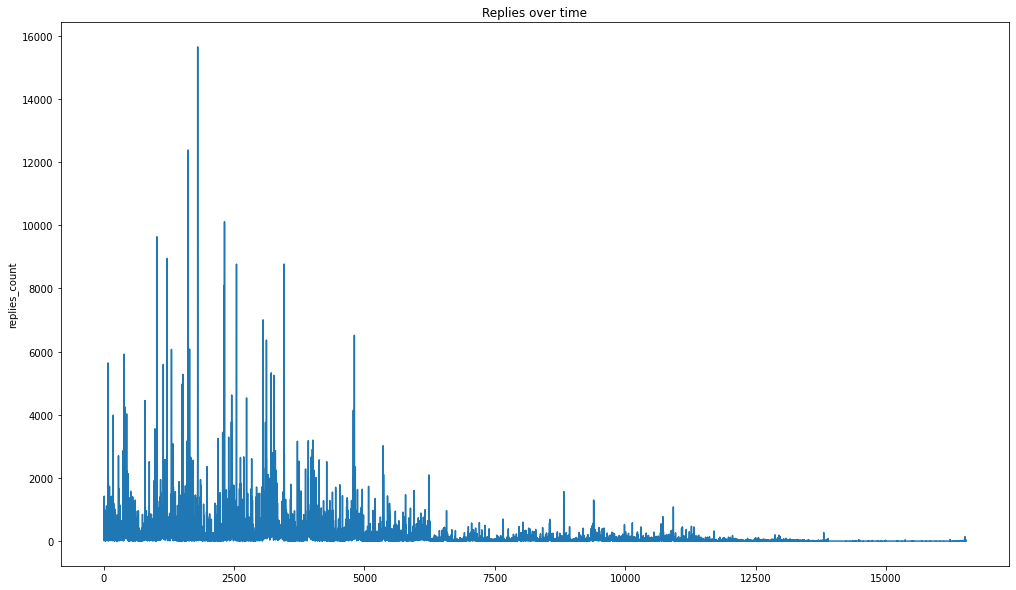

In [39]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df['replies_count'], dashes=False)
plt.title("Replies over time")
plt.show()

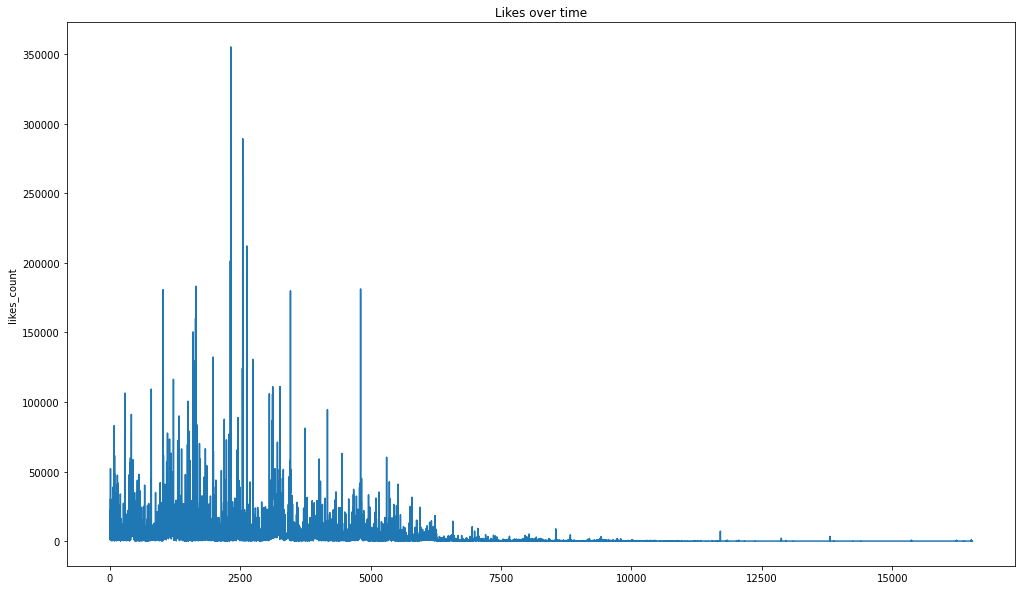

In [41]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df['likes_count'], dashes=False)
plt.title("Likes over time")
plt.show()

# View Common Phrases

In [128]:
#more imports
import re
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [130]:
# TOKENIZATION
def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  
df['clean_tweet_tokens'] = list(tokenize(df['clean_tweet']))

In [131]:
# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(["co","https","http", "tell", "tells", "game", "season", "sports", "two"])
# REMOVE STOPWORDS
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word    not in stop_words] for tweet in tweets]
df['tokens_no_stop'] = remove_stopwords(df['clean_tweet_tokens'])

In [132]:
# REMOVE TWEETS LESS THAN 3 TOKENS
df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)
df = df.drop(['length'], axis=1)
df.shape
df.reset_index(drop=True, inplace=True)

In [133]:
#Save the pre-processed dataframe as a pickle
df.to_pickle('pre-processed.pkl')

In [ ]:
#hide
#INSTALLS
!pip3 install networkx
!pip3 install itertools
!pip3 install collections
!pip3 install spacy
!pip3 install pprint
!pip3 install pyLDAvis
!pip3 install gensim
!pip3 install nltk
!pip3 install warnings

In [138]:
#hide
# IMPORTS
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
#import pyLDAvis.gensim
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [141]:
# TOKENIZE by adding Bigrams and Trigrams
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(df['clean_tweet']))

In [142]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [144]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('reporting', 'malika'),
 ('malika', 'andrews'),
 ('andrews', 'milwaukee'),
 ('milwaukee', 'giannis'),
 ('giannis', 'antetokounmpo'),
 ('antetokounmpo', 'continued'),
 ('continued', 'around'),
 ('around', 'clock'),
 ('clock', 'treatment'),
 ('treatment', 'left'),
 ('left', 'knee'),
 ('knee', 'hopes'),
 ('hopes', 'becoming'),
 ('becoming', 'cleared'),
 ('cleared', 'play'),
 ('play', 'finals'),
 ('finals', 'vs'),
 ('vs', 'phoenix'),
 ('phoenix', 'tonight'),
 ('tonight', 'expected'),
 ('expected', 'time'),
 ('time', 'decision'),
 ('decision', 'availability')]

In [145]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [146]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

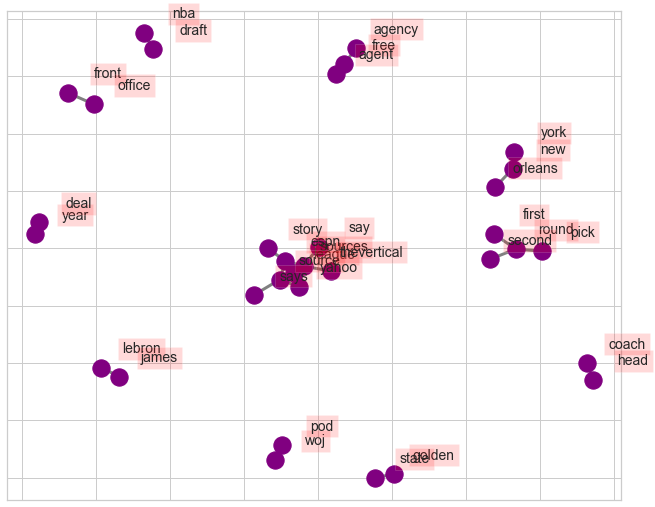

In [147]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

# Conclusion

Woj generally plays things pretty close to the vest. The words and phrases he uses tend to be pretty programmatic, and he rarely strays from his typical tweet structures. 

Journalists like Woj need to be very reliable and structured with how the break news. The popularity of Woj's Twitter account over time are a testament to this predictable, disciplined approach.